In [1]:
!pip install opendatasets

# load

In [2]:
import opendatasets as od
import os

In [3]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi

C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi


In [4]:
'''!pip install split-folders
'''

'!pip install split-folders\n'

In [5]:
'''import splitfolders
splitfolders.ratio('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/cat2dog/cat2dog', output = 
                   'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/fix_data', 
                   seed = 42, ratio = (0.7, 0.3), group_prefix = None)'''

"import splitfolders\nsplitfolders.ratio('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/cat2dog/cat2dog', output = \n                   'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/fix_data', \n                   seed = 42, ratio = (0.7, 0.3), group_prefix = None)"

In [6]:
#Define a path
base_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/cat2dog/cat2dog'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_cat_dir = os.path.join(train_dir, 'Cat')
train_dog_dir = os.path.join(train_dir, 'Dog')

test_cat_dir = os.path.join(test_dir, 'Cat')
test_dog_dir = os.path.join(test_dir, 'Dog')


In [7]:
print('Train_cat_dir :', os.listdir(train_cat_dir)[0:2])
print('Train_dog_dir :', os.listdir(train_dog_dir)[0:2])
print('Test_cat_dir :', os.listdir(test_cat_dir)[0:2])
print('Test_dog_dir :', os.listdir(test_dog_dir)[0:2])

Train_cat_dir : ['0.jpg', '1.jpg']
Train_dog_dir : ['0.jpg', '1.jpg']
Test_cat_dir : ['103.jpg', '104.jpg']
Test_dog_dir : ['1092.jpg', '1095.jpg']


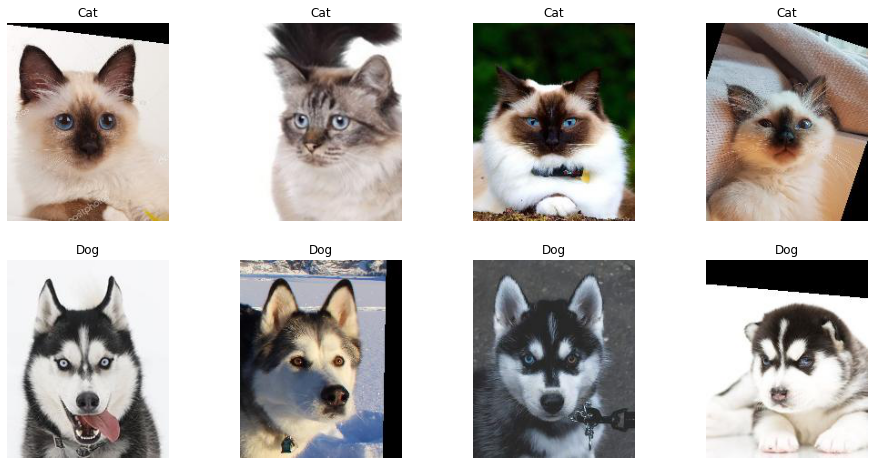

In [8]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
Train_cat = [os.path.join(train_cat_dir, fname) 
                for fname in os.listdir(train_cat_dir)[pic_index-4:pic_index]]

Train_dog = [os.path.join(train_dog_dir, fname) 
                for fname in os.listdir(train_dog_dir)[pic_index-4:pic_index]]
for i, img_path in enumerate(Train_cat+Train_dog):
    
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

# Preprocessing

In [9]:
'''import cv2
import numpy as np
'''

'import cv2\nimport numpy as np\n'

In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
'''train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      #shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
'''

Found 2035 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


Found 2035 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


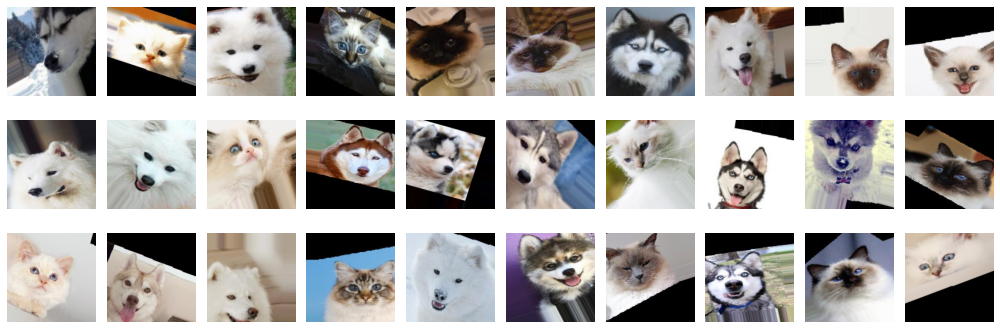

In [15]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      #shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

#tampilkan Data Generator
plt.figure(figsize = (14, 8))
for i in range(30):
    plt.subplot(5, 10, i + 1)
    
    for X, y in train_generator:

        plt.imshow(X[0])
        plt.axis("off")
        break
        
plt.tight_layout()
plt.show()

# Model Inception VGG16

https://www.kaggle.com/mustafacicek/dogs-cats-vgg16-implementation-transfer-learning

In [16]:
!pip install keras

In [17]:
import tensorflow as tf
#import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16

In [25]:
base_model = VGG16(input_shape = (150,150,3),
                           include_top = False,
                           weights = "imagenet")
base_model.trainable = False

In [37]:
# i add some of layer and setting dropout more big to avoid Overffiting in my model
print('Adding new layers')
x = base_model.get_layer(index = -1).output
x = Flatten()(base_model.output)
x = Dense(256,activation = "relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(64,activation = "relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x) 
print('Finished')

Adding new layers
Finished


In [41]:
model = Model(base_model.input, x)
model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [42]:
# setting Callback so we can save the best model in format h5 and i save it in my drive
callbacks = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')        
direc = 'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/Saved_Model/best_model_train_transfer_learning_VGG16.h5'
best_model = ModelCheckpoint(direc, monitor='val_acc', verbose = 1, save_best_only = True)

In [43]:
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=102,  # images = batch_size * steps
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callbacks, best_model])

Epoch 1/100
102/102 [==============================] - 390s 4s/step - loss: 0.3522 - acc: 0.8589 - val_loss: 0.0850 - val_acc: 0.9650

Epoch 00001: val_acc improved from -inf to 0.96500, saving model to C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/Saved_Model\best_model_train_transfer_learning_VGG16.h5
Epoch 2/100
102/102 [==============================] - 347s 3s/step - loss: 0.1390 - acc: 0.9438 - val_loss: 0.0164 - val_acc: 0.9900

Epoch 00002: val_acc improved from 0.96500 to 0.99000, saving model to C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/Saved_Model\best_model_train_transfer_learning_VGG16.h5
Epoch 3/100
102/102 [==============================] - 355s 3s/step - loss: 0.1150 - acc: 0.9578 - val_loss: 0.0177 - val_acc: 0.9950

Epoch 00003: val_acc improved from 0.99000 to 0.99500, saving model to C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/Saved_Model\best_model_train_transfer_learning_VGG16.h5
Epoch 4/100
102/102 [===================

# Model Evaluation

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import cv2

In [45]:
import json
from tensorflow.keras.models import load_model
target_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/Saved_Model/'
model_saved = load_model(target_dir + 'best_model_train_transfer_learning_VGG16.h5')

## Plotting + Accuracy

In [46]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


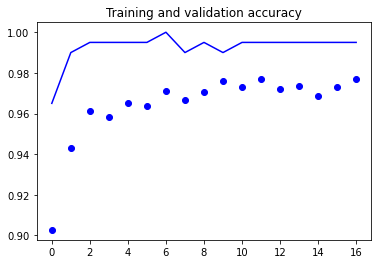

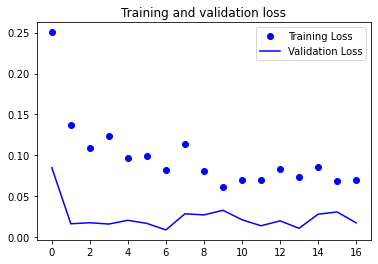

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Classification Report + Confusion Matrix

In [50]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        shuffle=False,
        class_mode='binary')

Found 200 images belonging to 2 classes.


In [51]:
test_score = model_saved.evaluate_generator(test_generator, test_generator.batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 100.00%
[INFO] Loss:  0.008929166942834854


In [52]:
predictions = model_saved.predict_generator(generator=test_generator)
test_pred = predictions > 0.5
y_test = test_generator.classes
Cmatrix_test = confusion_matrix(y_test, test_pred)

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [53]:
from sklearn.metrics import classification_report

label = test_generator.class_indices
print(classification_report(y_test, test_pred, target_names=label))

              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00       100
         Dog       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



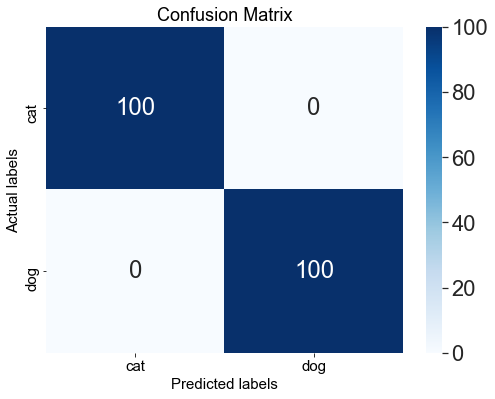

In [53]:
class_names = test_generator.class_indices
plt.figure(figsize = (8,6))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
cm_reshape = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(cm_reshape, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Actual labels', fontdict=label_font);

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(["cat", "dog"]);
ax.yaxis.set_ticklabels(["cat", "dog"]);
plt.show()

[[0.]]
cat


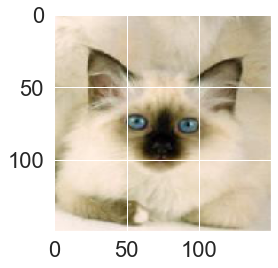

In [67]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
me = image.load_img('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/cat2dog/cat2dog/train/Cat/20.jpg', target_size= (150,150))
plt.imshow(me)
me = image.img_to_array(me)
me = np.expand_dims(me,axis=0)
model = load_model('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/Saved_Model/best_model_train_transfer_learning_VGG16.h5')
result_c = model.predict(me)
print(result_c)
if round(result_c[0][0]) == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print (prediction)

[[1.]]
dog


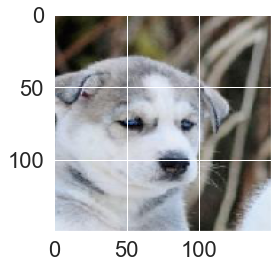

In [68]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
me = image.load_img('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/cat2dog/cat2dog/test/Dog/270.jpg', target_size= (150,150))
plt.imshow(me)
me = image.img_to_array(me)
me = np.expand_dims(me,axis=0)
model = load_model('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/Saved_Model/best_model_train_transfer_learning_VGG16.h5')
result_c = model.predict(me)
print(result_c)
if round(result_c[0][0]) == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print (prediction)